In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Define constants for creating our particle data
NUM_PARTICLES = 5000
SPIN_UP_MEAN = 2.0
SPIN_UP_STD_DEV = 1.3
SPIN_DOWN_MEAN = -2.0
SPIN_DOWN_STD_DEV = 1.3

# Generate position data using a normal (Gaussian) distribution
spin_up_positions = np.random.normal(loc=SPIN_UP_MEAN, scale=SPIN_UP_STD_DEV, size=NUM_PARTICLES)
spin_down_positions = np.random.normal(loc=SPIN_DOWN_MEAN, scale=SPIN_DOWN_STD_DEV, size=NUM_PARTICLES)

# Generate energy data, also from a normal distribution to create overlap
spin_up_energy = np.random.normal(loc=-2.0, scale=2, size=NUM_PARTICLES)
spin_down_energy = np.random.normal(loc=+2.0, scale=2, size=NUM_PARTICLES)

# Create labels: 1 for Spin Up, 0 for Spin Down
spin_up_labels = np.ones(NUM_PARTICLES)
spin_down_labels = np.zeros(NUM_PARTICLES)

# Combine the data into pandas DataFrames
df_up = pd.DataFrame({'position': spin_up_positions, 'interaction_energy': spin_up_energy, 'spin_label': spin_up_labels})
df_down = pd.DataFrame({'position': spin_down_positions, 'interaction_energy': spin_down_energy, 'spin_label': spin_down_labels})

# Concatenate the two dataframes, shuffle them randomly, and reset the index
df = pd.concat([df_up, df_down]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Data generation complete.\\n")

Data generation complete.\n


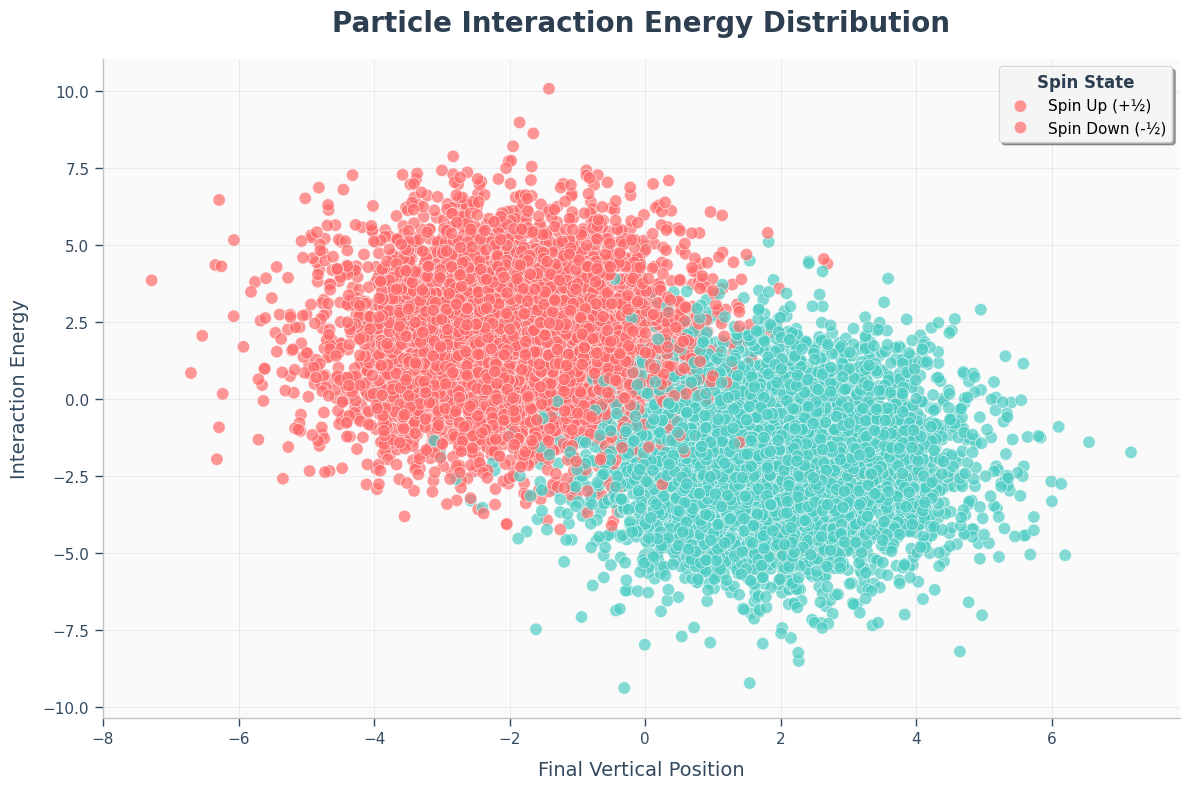

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')
sns.set_palette("husl")

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Define custom colors
colors = ['#FF6B6B', '#4ECDC4']

# Create the scatter plot using the seaborn library
scatter = sns.scatterplot(
    data=df,
    x='position',
    y='interaction_energy',
    hue='spin_label', 
    palette=colors,
    alpha=0.7,        
    s=80,             
    edgecolors='white', 
    linewidth=0.5,
    ax=ax
)


ax.set_facecolor('#fafafa')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Set titles and labels with specific fonts and colors
ax.set_title('Particle Interaction Energy Distribution',
             fontsize=20, fontweight='bold', pad=20,
             color='#2c3e50')
ax.set_xlabel('Final Vertical Position',
              fontsize=14, fontweight='medium',
              color='#34495e', labelpad=10)
ax.set_ylabel('Interaction Energy',
              fontsize=14, fontweight='medium',
              color='#34495e', labelpad=10)

# Style the axis ticks
ax.tick_params(axis='both', which='major', labelsize=11,
               colors='#34495e', length=6, width=1)

# Create a well-styled legend
legend = ax.legend(title='Spin State',
                  labels=['Spin Up (+½)', 'Spin Down (-½)'],
                  loc='upper right',
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  framealpha=0.9,
                  facecolor='white',
                  edgecolor='lightgray',
                  title_fontsize=12,
                  fontsize=11)
legend.get_title().set_fontweight('bold')
legend.get_title().set_color('#2c3e50')

# Remove the top and right plot borders for a cleaner look
sns.despine(ax=ax, top=True, right=True)


for spine in ax.spines.values():
    spine.set_edgecolor('#bdc3c7')
    spine.set_linewidth(1)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show() 

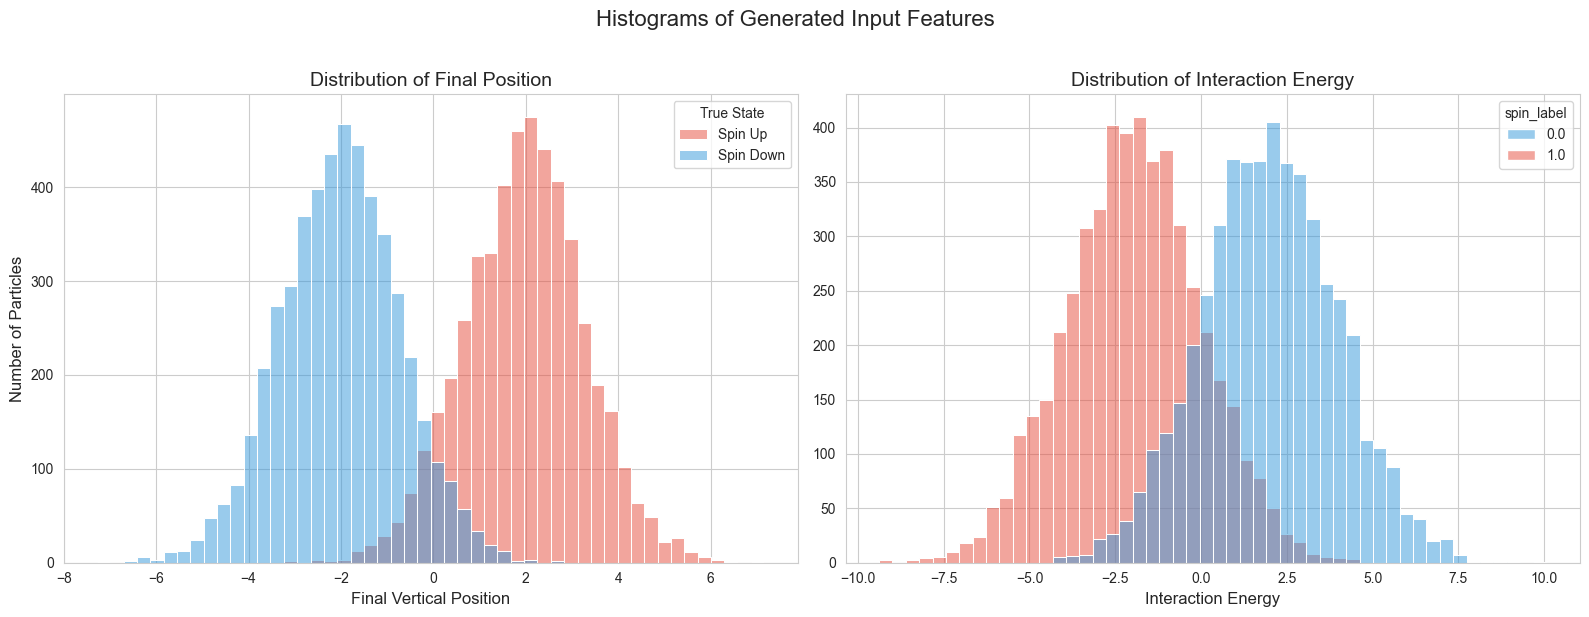

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a figure with 1 row and 2 columns for our plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Histogram for the 'position' feature ---
sns.histplot(data=df, x='position', hue='spin_label', bins=50, palette=['#3498db', '#e74c3c'], ax=axes[0])
axes[0].set_title('Distribution of Final Position', fontsize=14)
axes[0].set_xlabel('Final Vertical Position', fontsize=12)
axes[0].set_ylabel('Number of Particles', fontsize=12)
axes[0].legend(title='True State', labels=['Spin Up', 'Spin Down'])

# --- Plot 2: Histogram for the 'interaction_energy' feature ---
sns.histplot(data=df, x='interaction_energy', hue='spin_label', bins=50, palette=['#3498db', '#e74c3c'], ax=axes[1])
axes[1].set_title('Distribution of Interaction Energy', fontsize=14)
axes[1].set_xlabel('Interaction Energy', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for the second plot for a cleaner look

# Add a main title for the whole figure
plt.suptitle('Histograms of Generated Input Features', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# X are the "clues" (position, energy), y is the spin label
X = df[['position', 'interaction_energy']]
y = df['spin_label']

# --- 2. Split Data into Training and Testing Sets ---
# 80% for training, 20% for testing. random_state ensures the split is the same every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize and Train the BDT Model ---
print("--- Training Gradient Boosting (BDT) ---")
bdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
bdt_model.fit(X_train, y_train) # The actual training step
bdt_predictions = bdt_model.predict(X_test) # Make predictions on the test set
bdt_accuracy = accuracy_score(y_test, bdt_predictions) # Check accuracy
print(f"BDT Model Accuracy: {bdt_accuracy:.4f}")

# --- 4. Initialize and Train the SVM Model ---
print("\\n--- Training Support Vector Machine (SVM) ---")
# probability=True is critical for plotting an ROC curve later
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train) # Training the SVM
svm_predictions = svm_model.predict(X_test) # Predictions
svm_accuracy = accuracy_score(y_test, svm_predictions) # Accuracy
print(f"SVM Model Accuracy: {svm_accuracy:.4f}")

--- Training Gradient Boosting (BDT) ---
BDT Model Accuracy: 0.9735
\n--- Training Support Vector Machine (SVM) ---
BDT Model Accuracy: 0.9735
\n--- Training Support Vector Machine (SVM) ---
SVM Model Accuracy: 0.9735
SVM Model Accuracy: 0.9735


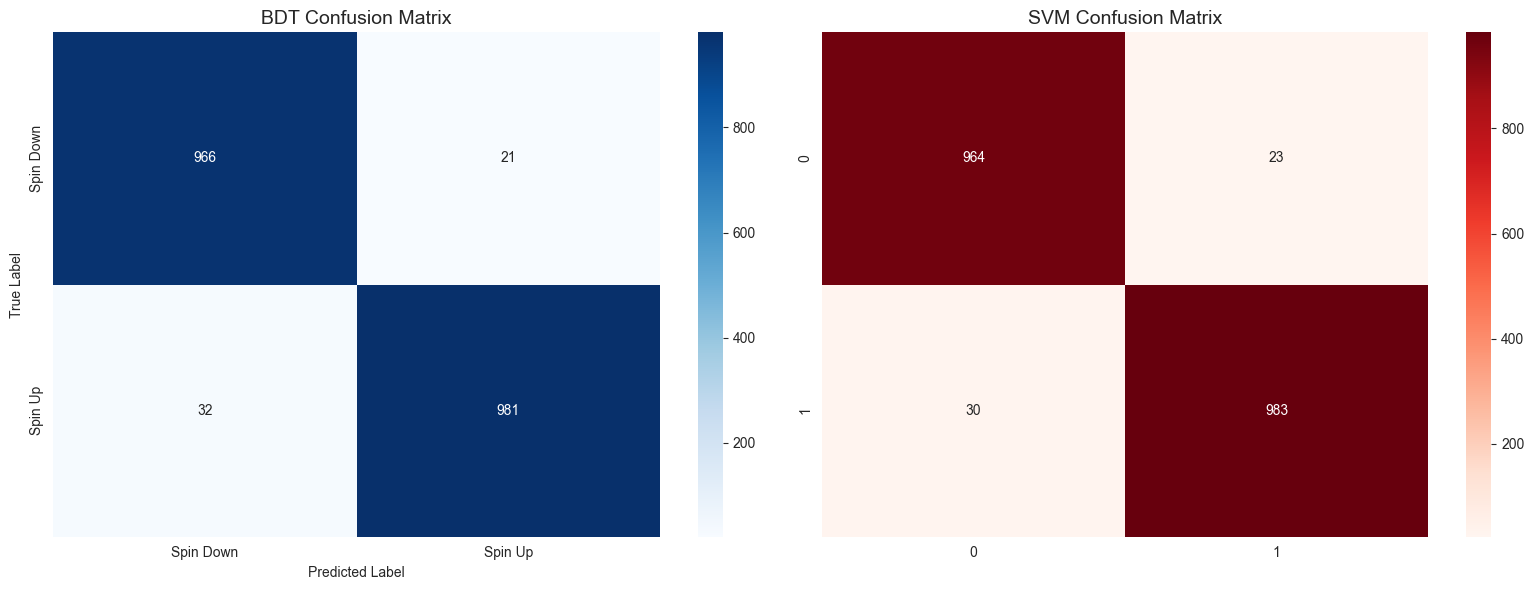

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate matrices by comparing true labels (y_test) with model predictions
bdt_cm = confusion_matrix(y_test, bdt_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

# Create a figure with 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot BDT Confusion Matrix
sns.heatmap(bdt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('BDT Confusion Matrix', fontsize=14)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['Spin Down', 'Spin Up'])
axes[0].set_yticklabels(['Spin Down', 'Spin Up'])

# Plot SVM Confusion Matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix', fontsize=14)

plt.tight_layout()
plt.show()

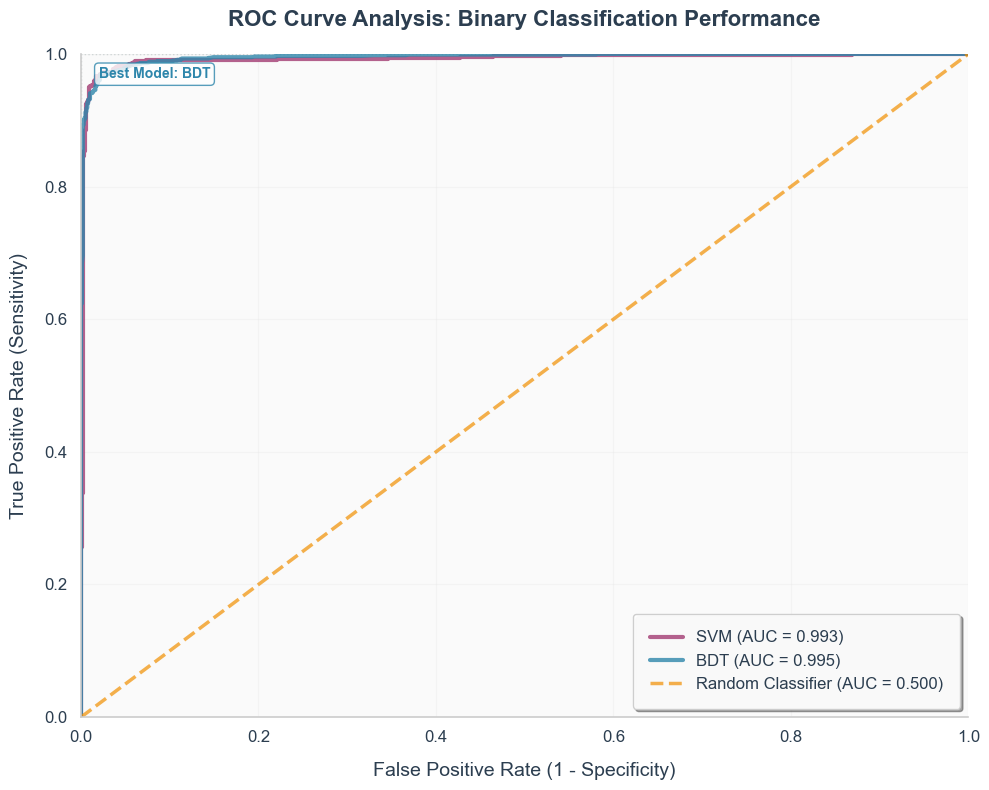

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# --- Get the prediction probabilities for the "Spin Up" class (class 1) ---
# For BDT
bdt_probs = bdt_model.predict_proba(X_test)[:, 1]
# For SVM
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# --- Calculate ROC curve data points ---
# For BDT
bdt_fpr, bdt_tpr, _ = roc_curve(y_test, bdt_probs)
bdt_auc = auc(bdt_fpr, bdt_tpr)

# For SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)


fig, ax = plt.subplots(figsize=(10, 8), dpi=100)


colors = {
    'bdt': '#2E86AB',      
    'svm': '#A23B72',    
    'random': '#F18F01',   
    'grid': '#E5E5E5',   
    'text': '#2C3E50'      
}

# Plot SVM curve
ax.plot(svm_fpr, svm_tpr, 
        color=colors['svm'], 
        linewidth=3,
        label=f'SVM (AUC = {svm_auc:.3f})',
        alpha=0.8)

# Plot BDT curve
ax.plot(bdt_fpr, bdt_tpr, 
        color=colors['bdt'], 
        linewidth=3,
        label=f'BDT (AUC = {bdt_auc:.3f})',
        alpha=0.8)

# Plot random classifier line
ax.plot([0, 1], [0, 1], 
        color=colors['random'], 
        linewidth=2.5, 
        linestyle='--',
        label='Random Classifier (AUC = 0.500)',
        alpha=0.7)


# Set background and grid
ax.set_facecolor('#FAFAFA')
ax.grid(True, alpha=0.3, color=colors['grid'], linewidth=0.8)
ax.set_axisbelow(True)


ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])


ax.set_xlabel('False Positive Rate (1 - Specificity)', 
              fontsize=14, fontweight='medium', 
              color=colors['text'], labelpad=12)
ax.set_ylabel('True Positive Rate (Sensitivity)', 
              fontsize=14, fontweight='medium', 
              color=colors['text'], labelpad=12)

ax.set_title('ROC Curve Analysis: Binary Classification Performance',
             fontsize=16, fontweight='bold', 
             color=colors['text'], pad=20)


ax.tick_params(axis='both', which='major', 
               labelsize=12, colors=colors['text'],
               length=6, width=1.2)


ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))

# Format tick labels to show one decimal place
ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.2)])
ax.set_yticklabels([f'{y:.1f}' for y in np.arange(0, 1.1, 0.2)])


legend = ax.legend(loc="lower right", 
                  fontsize=12,
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  framealpha=0.95,
                  facecolor='white',
                  edgecolor='#CCCCCC',
                  borderpad=1.0)


for text in legend.get_texts():
    text.set_color(colors['text'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('#CCCCCC')
    ax.spines[spine].set_linewidth(1.2)


ax.plot([0, 0, 1], [0, 1, 1], 
        color='#95A5A6', 
        linewidth=1, 
        linestyle=':', 
        alpha=0.5,
        zorder=0)

# Add performance annotations
if bdt_auc > svm_auc:
    best_model = 'BDT'
    best_auc = bdt_auc
    best_color = colors['bdt']
else:
    best_model = 'SVM'
    best_auc = svm_auc
    best_color = colors['svm']

# Add subtle performance indicator
ax.text(0.02, 0.98, f'Best Model: {best_model}', 
        transform=ax.transAxes,
        fontsize=10, 
        fontweight='bold',
        color=best_color,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.3', 
                 facecolor='white', 
                 edgecolor=best_color,
                 alpha=0.8))

# Tight layout
plt.tight_layout()


plt.show()

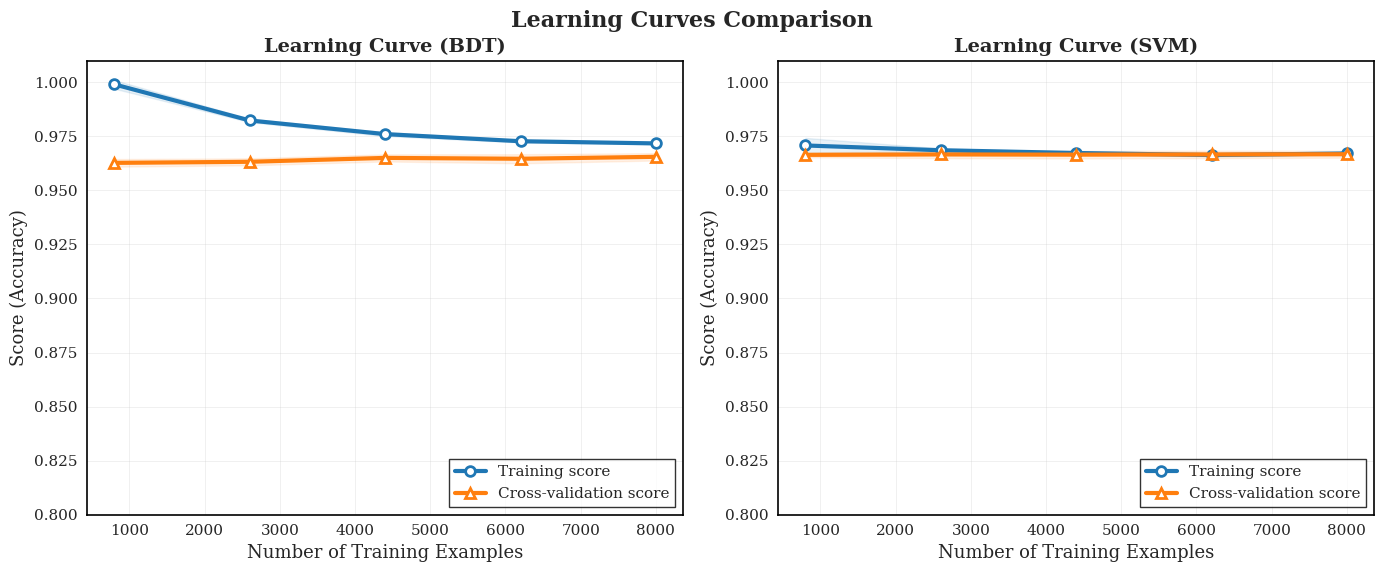

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Set clean research paper style
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 13,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'lines.linewidth': 3,
    'lines.markersize': 7,
    'axes.linewidth': 1.2
})

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title, fontweight='bold')
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Number of Training Examples")
    axes.set_ylabel("Score (Accuracy)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve with clear separation
    axes.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    
    
    train_color = '#1f77b4'  
    val_color = '#ff7f0e'    
    
    # Thinner, more transparent fill areas
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color=train_color)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color=val_color)
    
    # Bold, distinct lines with different markers
    axes.plot(train_sizes, train_scores_mean, 'o-', color=train_color,
             label="Training score", linewidth=3, markersize=7, 
             markerfacecolor='white', markeredgewidth=2)
    axes.plot(train_sizes, test_scores_mean, '^-', color=val_color,
             label="Cross-validation score", linewidth=3, markersize=7,
             markerfacecolor='white', markeredgewidth=2)
    
    axes.legend(loc="lower right", frameon=True, fancybox=False, shadow=False,
               edgecolor='black', facecolor='white')
    axes.set_facecolor('white')
    
    # Add border around plot
    for spine in axes.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('black')
    
    return plt

# Create new instances of models
bdt_learner = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_learner = SVC(kernel='rbf', C=1.0, random_state=42)

# Create figure with clean layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Learning Curves Comparison', fontsize=16, fontweight='bold', y=0.95)


plot_learning_curve(bdt_learner, "Learning Curve (BDT)", X, y, axes=axes[0], ylim=(0.8, 1.01), cv=5)

plot_learning_curve(svm_learner, "Learning Curve (SVM)", X, y, axes=axes[1], ylim=(0.8, 1.01), cv=5)

plt.tight_layout()
plt.show()


### Step 8: Comparing which clues each model found most important... ###


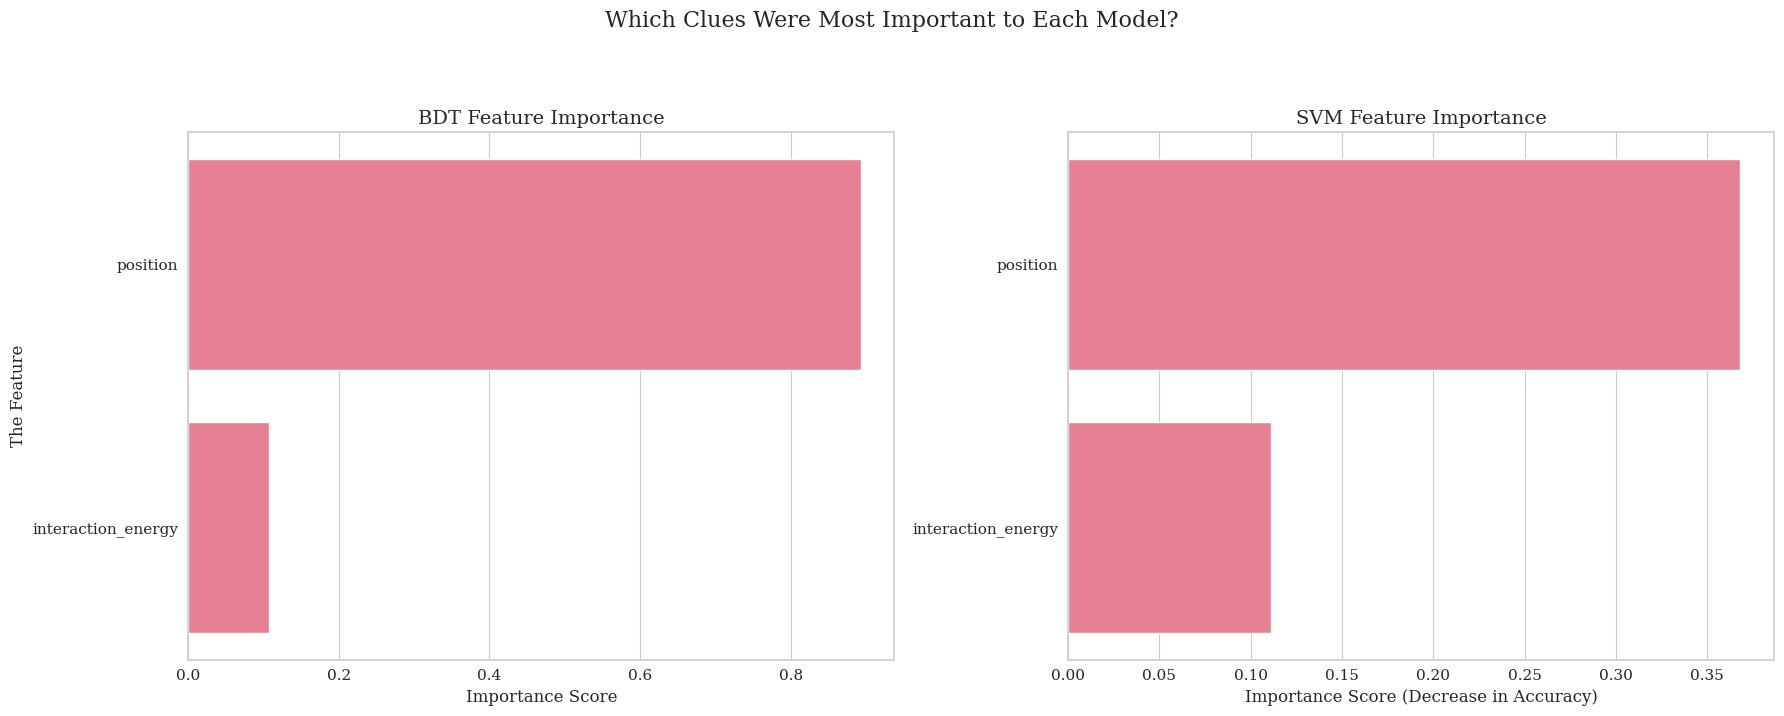


--- Numerical Importance Scores ---

BDT Scores:
position              0.892921
interaction_energy    0.107079
dtype: float64

SVM Scores:
position              0.36815
interaction_energy    0.11095
dtype: float64


In [9]:
print("\n### Step 8: Comparing which clues each model found most important... ###")

from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Get Importance Scores for BDT (Direct Method) ---
bdt_importances = bdt_model.feature_importances_
bdt_feat_importances = pd.Series(bdt_importances, index=X.columns).sort_values(ascending=False)

# --- 2. Get Importance Scores for SVM (Permutation Method) ---
# This might take a few seconds to run as it's re-evaluating the model
svm_perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
svm_feat_importances = pd.Series(svm_perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)


# --- 3. Create a Figure with Two Subplots (Side-by-Side) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 1 row, 2 columns

# Add a main title for the whole figure
fig.suptitle('Which Clues Were Most Important to Each Model?', fontsize=16, y=1.02)


# --- Plot 1: BDT Feature Importance ---
sns.barplot(x=bdt_feat_importances, y=bdt_feat_importances.index, ax=axes[0])
axes[0].set_title('BDT Feature Importance', fontsize=14)
axes[0].set_xlabel('Importance Score', fontsize=12)
axes[0].set_ylabel('The Feature', fontsize=12)


# --- Plot 2: SVM Feature Importance ---
sns.barplot(x=svm_feat_importances, y=svm_feat_importances.index, ax=axes[1])
axes[1].set_title('SVM Feature Importance', fontsize=14)
axes[1].set_xlabel('Importance Score (Decrease in Accuracy)', fontsize=12)
axes[1].set_ylabel('') # Hide the y-label for the second plot for a cleaner look


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the suptitle
plt.show()


# --- Optional: Print the exact numerical scores for reference ---
print("\n--- Numerical Importance Scores ---")
print("\nBDT Scores:")
print(bdt_feat_importances)
print("\nSVM Scores:")
print(svm_feat_importances)

In [10]:
print("\n### Step 6: Adding new classifiers to the comparison... ###")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# --- 1. Scale the Data AND Preserve Column Names ---
scaler = StandardScaler()
# First, get the scaled data as a NumPy array
X_train_scaled_np = scaler.fit_transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

# Convert the NumPy arrays back to pandas DataFrames
# This keeps our feature names consistent everywhere.
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test.columns)


# --- 2. Train and Evaluate Logistic Regression ---
print("\n--- Training Logistic Regression ---")
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = auc(logreg_fpr, logreg_tpr)
print(f"Logistic Regression AUC: {logreg_auc:.4f}")

# --- 3. Train and Evaluate K-Nearest Neighbors (KNN) ---
print("\n--- Training K-Nearest Neighbors ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)
print(f"KNN AUC: {knn_auc:.4f}")


### Step 6: Adding new classifiers to the comparison... ###

--- Training Logistic Regression ---
Logistic Regression AUC: 0.9964

--- Training K-Nearest Neighbors ---
KNN AUC: 0.9899




### Part 2: Deep Dive into ANN Training ###

--- Training ANN with Binary Cross-Entropy (Correct Method) ---

--- Training ANN with Binary Cross-Entropy (Correct Method) ---
--- Training ANN with Mean Squared Error (Regression Method) ---
--- Training ANN with Mean Squared Error (Regression Method) ---


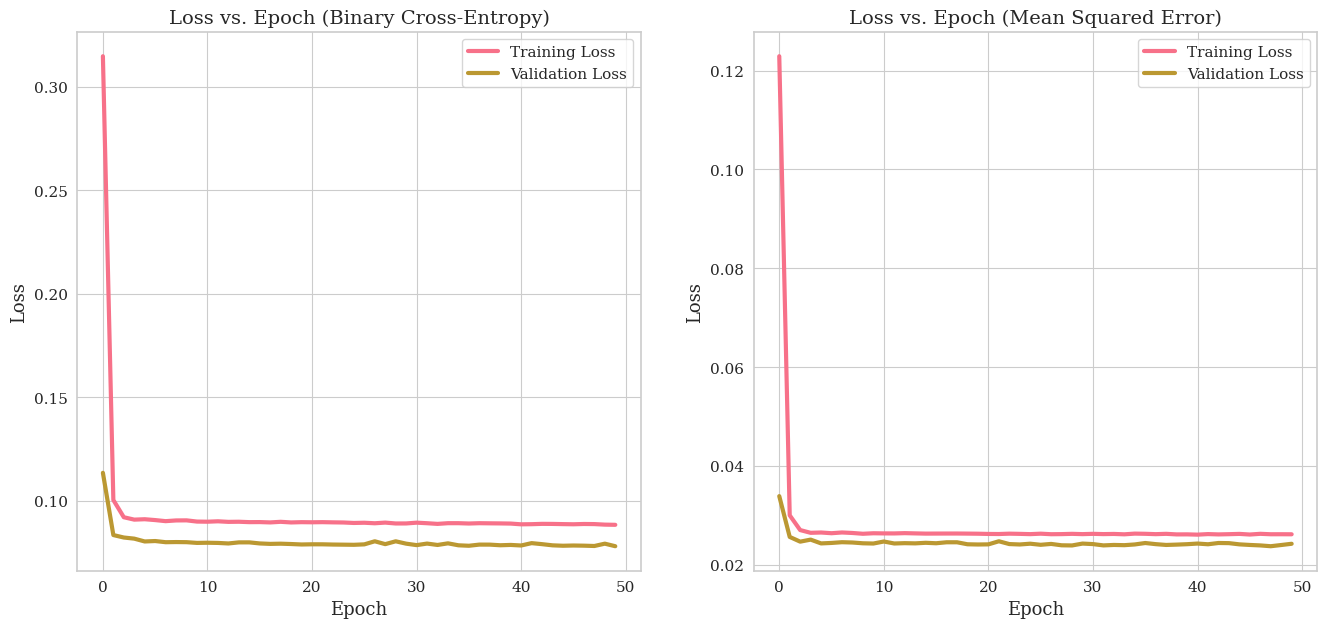

In [11]:
print("\n\n### Part 2: Deep Dive into ANN Training ###")


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt

# --- Define a function to build our ANN model 
def build_ann_model(loss_function):
    model = keras.Sequential([
        
        keras.Input(shape=(X_train_scaled.shape[1],)),

        
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])
    return model

# --- A. Train ANN with Binary Cross-Entropy ---
print("\n--- Training ANN with Binary Cross-Entropy (Correct Method) ---")
ann_model_bce = build_ann_model('binary_crossentropy')
# 'history' will store the loss and accuracy from each epoch
history_bce = ann_model_bce.fit(
    X_train_scaled, y_train,
    validation_split=0.2, # Use part of training data for validation during training
    verbose=0, # Suppress the lengthy output for each epoch
    epochs=50)


# --- B. Train ANN with Mean Squared Error ---
print("--- Training ANN with Mean Squared Error (Regression Method) ---")
ann_model_mse = build_ann_model('mean_squared_error')
history_mse = ann_model_mse.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    verbose=0,
    epochs=50)


# --- C. Plot the Loss vs. Epoch Graphs ---
plt.figure(figsize=(16, 7))

# Plot for Binary Cross-Entropy
plt.subplot(1, 2, 1)
plt.plot(history_bce.history['loss'], label='Training Loss')
plt.plot(history_bce.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch (Binary Cross-Entropy)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

#Plot for Mean Squared Error
plt.subplot(1, 2, 2)
plt.plot(history_mse.history['loss'], label='Training Loss')
plt.plot(history_mse.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch (Mean Squared Error)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


--- Comparing final performance on the Grand ROC Plot ---
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


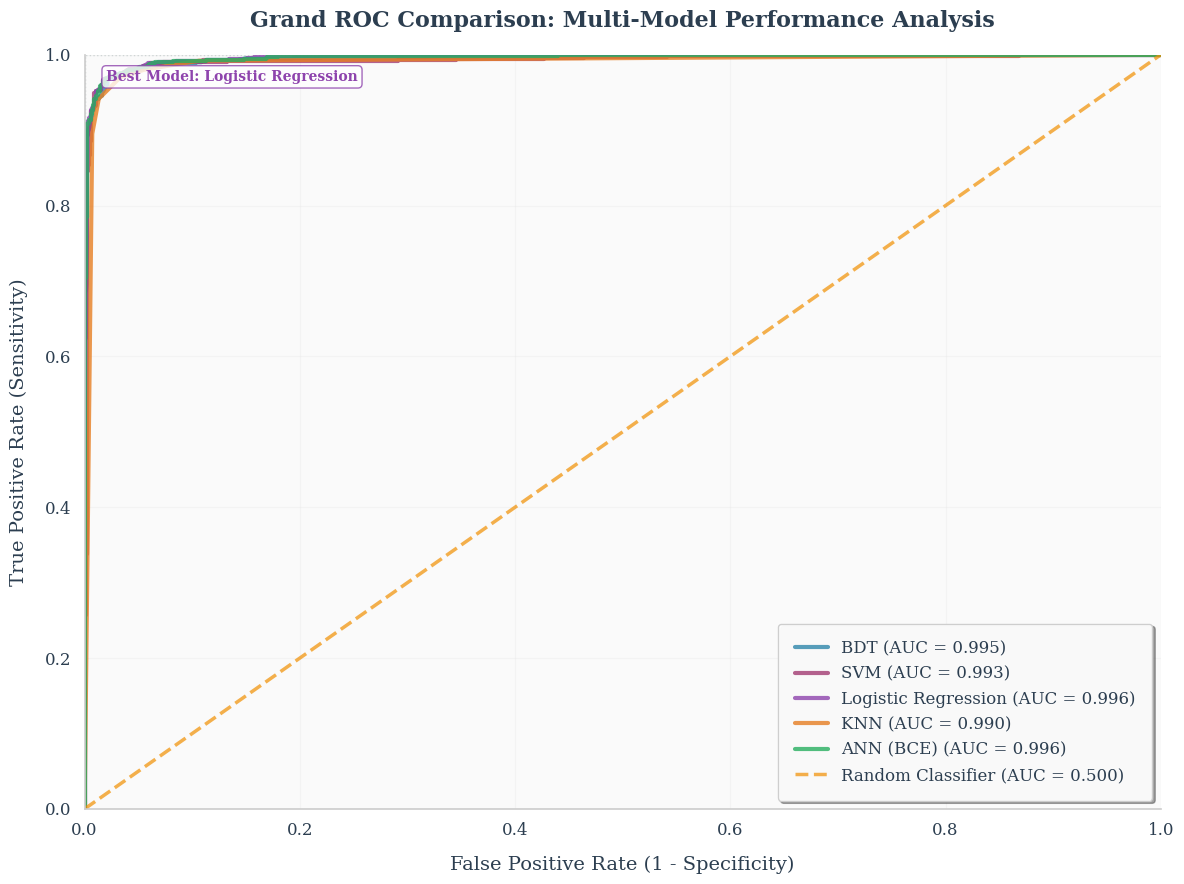

In [12]:
# --- Final Step Part 1: Grand ROC Curve Comparison ---
print("\n--- Comparing final performance on the Grand ROC Plot ---")

# --- 1. Initialize dictionaries to store results ---
# This dictionary will hold the data needed to plot each ROC curve.
roc_data = {
    "BDT": {'fpr': bdt_fpr, 'tpr': bdt_tpr, 'auc': bdt_auc},
    "SVM": {'fpr': svm_fpr, 'tpr': svm_tpr, 'auc': svm_auc},
    "Logistic Regression": {'fpr': logreg_fpr, 'tpr': logreg_tpr, 'auc': logreg_auc},
    "KNN": {'fpr': knn_fpr, 'tpr': knn_tpr, 'auc': knn_auc}
}

# --- 2. Calculate ROC data for the ANN ---
# Keras models use .predict(), which gives probabilities directly from the sigmoid layer.
# .flatten() reshapes the output to work with the roc_curve function.
ann_probs = ann_model_bce.predict(X_test_scaled).flatten()
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)
ann_auc = auc(ann_fpr, ann_tpr)

# Add the ANN's data to our dictionary
roc_data["ANN (BCE)"] = {'fpr': ann_fpr, 'tpr': ann_tpr, 'auc': ann_auc}



fig, ax = plt.subplots(figsize=(12, 9), dpi=100)

colors = {
    'BDT': '#2E86AB',
    'SVM': '#A23B72',
    'Logistic Regression': '#8E44AD',
    'KNN': '#E67E22',
    'ANN (BCE)': '#27AE60',
    'random': '#F18F01',
    'grid': '#E5E5E5',
    'text': '#2C3E50'
}

# Plot each model's ROC curve
for name, data in roc_data.items():
    ax.plot(data['fpr'], data['tpr'], 
            color=colors.get(name, '#34495E'),
            linewidth=3,
            label=f'{name} (AUC = {data["auc"]:.3f})',
            alpha=0.8)

# Plot random classifier line
ax.plot([0, 1], [0, 1], 
        color=colors['random'], 
        linewidth=2.5, 
        linestyle='--',
        label='Random Classifier (AUC = 0.500)',
        alpha=0.7)

# Set background and grid
ax.set_facecolor('#FAFAFA')
ax.grid(True, alpha=0.3, color=colors['grid'], linewidth=0.8)
ax.set_axisbelow(True)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='medium', color=colors['text'], labelpad=12)
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='medium', color=colors['text'], labelpad=12)
ax.set_title('Grand ROC Comparison: Multi-Model Performance Analysis', fontsize=16, fontweight='bold', color=colors['text'], pad=20)
ax.tick_params(axis='both', which='major', labelsize=12, colors=colors['text'], length=6, width=1.2)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.2)])
ax.set_yticklabels([f'{y:.1f}' for y in np.arange(0, 1.1, 0.2)])
legend = ax.legend(loc="lower right", fontsize=12, frameon=True, fancybox=True, shadow=True, framealpha=0.95, facecolor='white', edgecolor='#CCCCCC', borderpad=1.0)
for text in legend.get_texts():
    text.set_color(colors['text'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('#CCCCCC')
    ax.spines[spine].set_linewidth(1.2)
ax.plot([0, 0, 1], [0, 1, 1], color='#95A5A6', linewidth=1, linestyle=':', alpha=0.5, zorder=0)
best_model = max(roc_data, key=lambda x: roc_data[x]['auc'])
best_auc = roc_data[best_model]['auc']
best_color = colors.get(best_model, '#34495E')
ax.text(0.02, 0.98, f'Best Model: {best_model}', transform=ax.transAxes, fontsize=10, fontweight='bold', color=best_color, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=best_color, alpha=0.8))
plt.tight_layout()
plt.show()


### Plotting Well-Spaced Confusion Matrices for All Trained Models ###
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


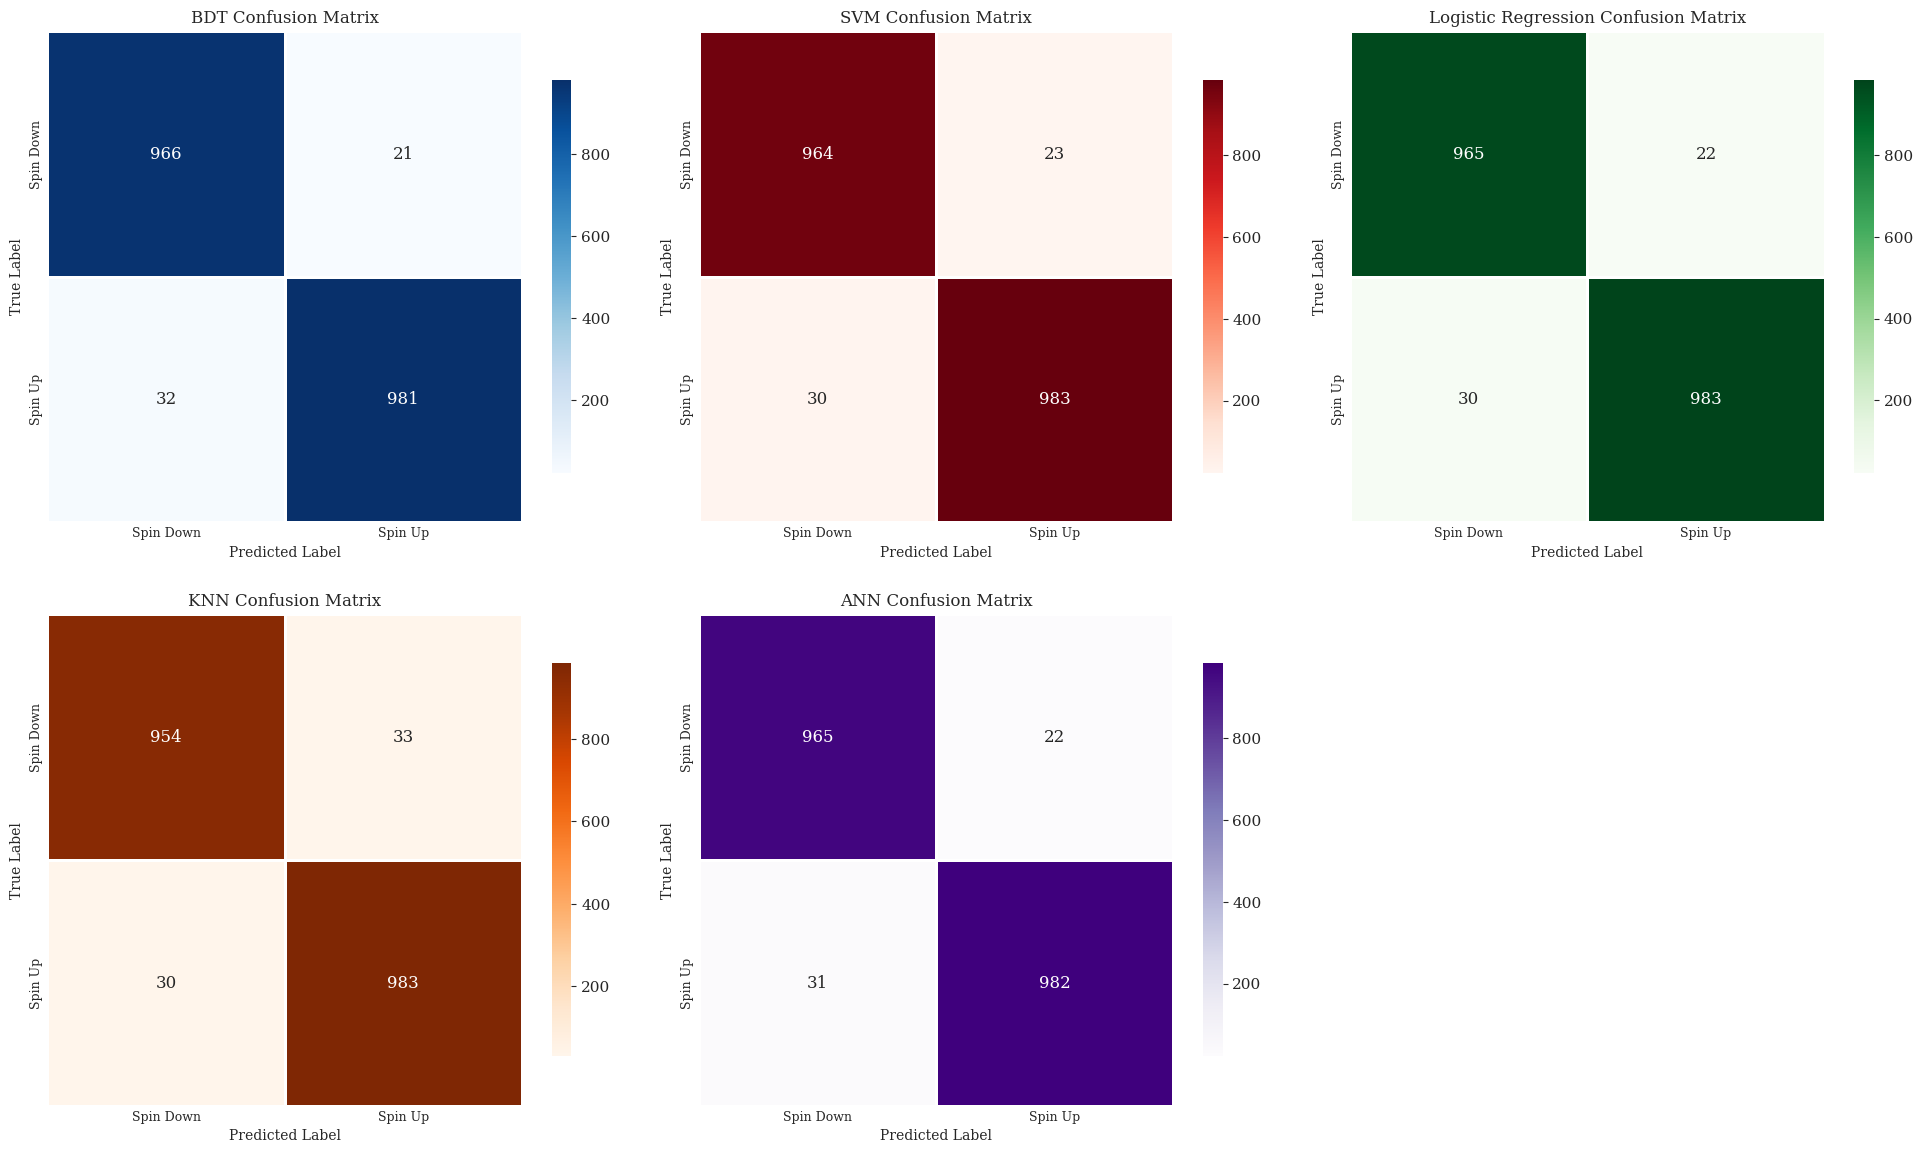

In [ ]:

print("\n### Plotting Well-Spaced Confusion Matrices for All Trained Models ###")

# --- 1. Generate Predictions for Each Model ---
logreg_predictions = logreg_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)
ann_predictions = (ann_model_bce.predict(X_test_scaled) > 0.5).astype("int32")

# --- 2. Calculate Confusion Matrices ---
bdt_cm = confusion_matrix(y_test, bdt_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
logreg_cm = confusion_matrix(y_test, logreg_predictions) 
knn_cm = confusion_matrix(y_test, knn_predictions)
ann_cm = confusion_matrix(y_test, ann_predictions)

# --- 3. Create and Display the Plots ---
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# BDT Confusion Matrix
sns.heatmap(bdt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            annot_kws={"size": 12},
            linewidths=1, cbar_kws={"shrink": 0.8})
axes[0].set_title('BDT Confusion Matrix', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=10)
axes[0].set_ylabel('True Label', fontsize=10)
axes[0].set_xticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[0].set_yticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[0].tick_params(axis='both', which='major', length=0, width=0)

# SVM Confusion Matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            annot_kws={"size": 12},
            linewidths=1, cbar_kws={"shrink": 0.8})
axes[1].set_title('SVM Confusion Matrix', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=10)
axes[1].set_ylabel('True Label', fontsize=10)
axes[1].set_xticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[1].set_yticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[1].tick_params(axis='both', which='major', length=0, width=0)

# Logistic Regression Confusion Matrix
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Greens', ax=axes[2],
            annot_kws={"size": 12},
            linewidths=1, cbar_kws={"shrink": 0.8})
axes[2].set_title('Logistic Regression Confusion Matrix', fontsize=12)
axes[2].set_xlabel('Predicted Label', fontsize=10)
axes[2].set_ylabel('True Label', fontsize=10)
axes[2].set_xticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[2].set_yticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[2].tick_params(axis='both', which='major', length=0, width=0)

# KNN Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[3],
            annot_kws={"size": 12},
            linewidths=1, cbar_kws={"shrink": 0.8})
axes[3].set_title('KNN Confusion Matrix', fontsize=12)
axes[3].set_xlabel('Predicted Label', fontsize=10)
axes[3].set_ylabel('True Label', fontsize=10)
axes[3].set_xticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[3].set_yticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[3].tick_params(axis='both', which='major', length=0, width=0)

# ANN Confusion Matrix
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Purples', ax=axes[4],
            annot_kws={"size": 12},
            linewidths=1, cbar_kws={"shrink": 0.8})
axes[4].set_title('ANN Confusion Matrix', fontsize=12)
axes[4].set_xlabel('Predicted Label', fontsize=10)
axes[4].set_ylabel('True Label', fontsize=10)
axes[4].set_xticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[4].set_yticklabels(['Spin Down', 'Spin Up'], fontsize=9)
axes[4].tick_params(axis='both', which='major', length=0, width=0)

# Hide the empty subplot
axes[-1].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()



### Comparing Feature Importance Across All Models ###
Training a wrapped ANN for permutation importance analysis...


C:\Users\Khabab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


...Training complete.


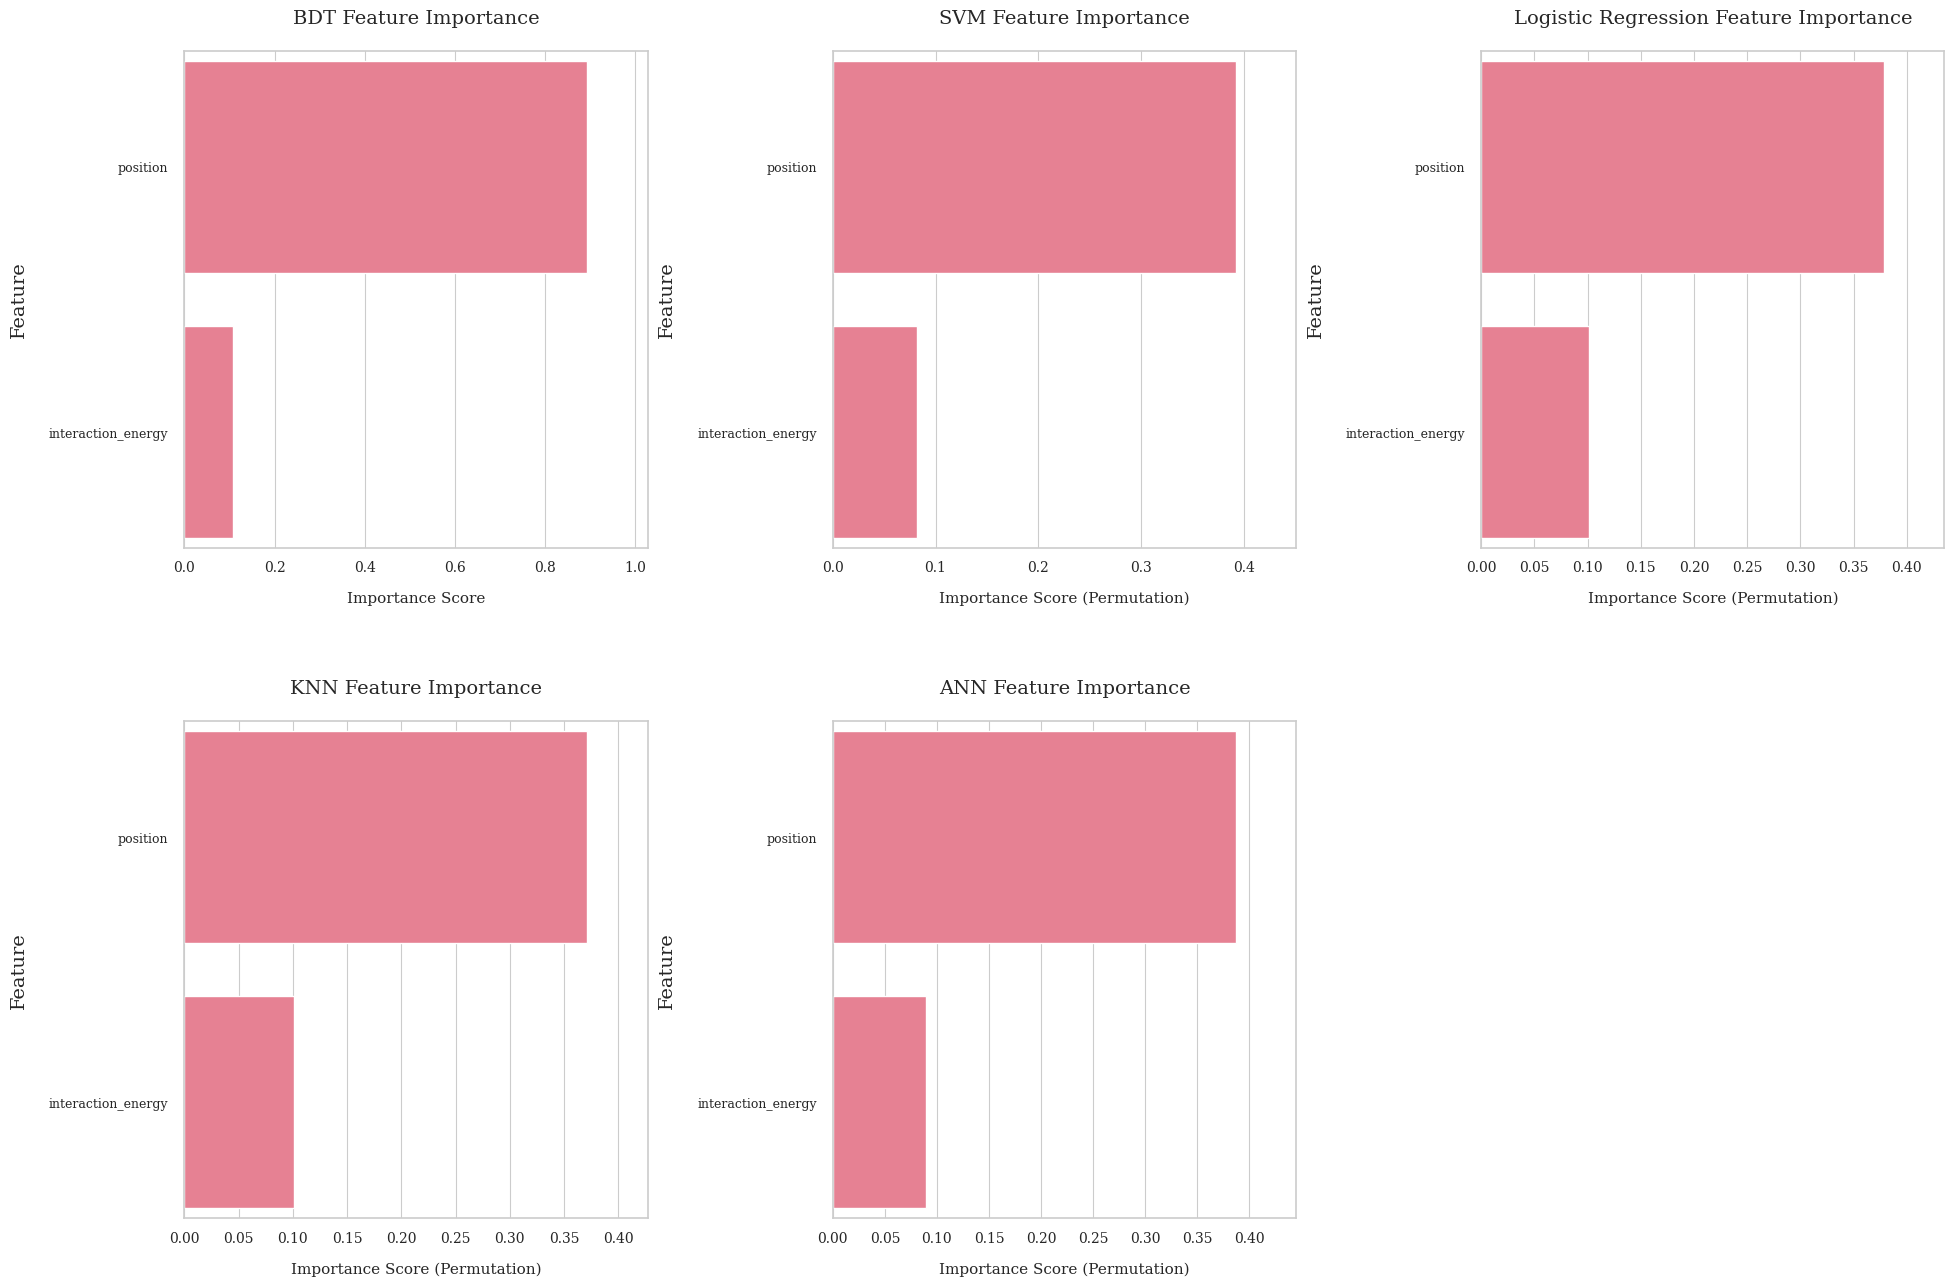

\n### Summary Table: Feature Importance Scores from Current Code ###


,Particle Position,Interaction Energy,Position/Energy Ratio,Method
BDT,0.893,0.107,8.34,Impurity-based
SVM,0.392,0.082,4.76,Permutation
Logistic Regression,0.379,0.102,3.73,Permutation
KNN,0.371,0.101,3.69,Permutation
ANN,0.387,0.089,4.33,Permutation


In [ ]:

print("\n### Comparing Feature Importance Across All Models ###")

from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier 

# --- Get Importance Scores ---
bdt_importances = bdt_model.feature_importances_

# We need a trained, scikit-learn compatible ANN to test.
# We will create and train a new wrapped ANN model just for this analysis.
print("Training a wrapped ANN for permutation importance analysis...")
ann_wrapped_model = KerasClassifier(build_fn=build_ann_model, loss_function='binary_crossentropy', epochs=50, verbose=0)
ann_wrapped_model.fit(X_train_scaled, y_train)
print("...Training complete.")

# Permutation Importance for the scikit-learn models
svm_perm = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
logreg_perm = permutation_importance(logreg_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_perm = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

#Now we use our new *wrapped and trained* ANN model here
ann_perm = permutation_importance(ann_wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a dictionary of the importance scores for plotting
all_importances = {
    "BDT": pd.Series(bdt_importances, index=X.columns),
    "SVM": pd.Series(svm_perm.importances_mean, index=X.columns),
    "Logistic Regression": pd.Series(logreg_perm.importances_mean, index=X.columns),
    "KNN": pd.Series(knn_perm.importances_mean, index=X.columns),
    "ANN": pd.Series(ann_perm.importances_mean, index=X.columns)
}


fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes = axes.flatten()

for i, (name, importances) in enumerate(all_importances.items()):
    importances = importances.sort_values(ascending=False)
    sns.barplot(x=importances, y=importances.index, ax=axes[i])
    
    
    axes[i].set_title(f"{name} Feature Importance", fontsize=14, pad=20)

    xlabel_text = "Importance Score"
    if name != "BDT":
        xlabel_text += " (Permutation)"
    axes[i].set_xlabel(xlabel_text, labelpad=12, fontsize=11)
    
    axes[i].set_ylabel("Feature", labelpad=15, fontsize=14, fontweight='medium')
    
    # Fix y-axis labels (feature names) - prevent overlap
    axes[i].tick_params(axis='y', which='major', pad=8, labelsize=10)
    axes[i].tick_params(axis='x', which='major', pad=6, labelsize=10)
    
    
    plt.setp(axes[i].get_yticklabels(), ha='right')
    # Add margins to the axes for better spacing
    axes[i].margins(x=0.15, y=0.02)
    
    # Adjust the subplot area to give more room for labels
    axes[i].tick_params(axis='y', which='major', labelsize=9)

axes[-1].set_visible(False)
plt.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=0.35, wspace=0.4, left=0.15, right=0.95)
plt.show()



In [21]:
print("\\n### Summary Table: Feature Importance Scores from Current Code ###")

# This cell uses the 'all_importances' dictionary created in the feature importance cell above.

# 1. Convert the dictionary of Series into a DataFrame
importance_df = pd.DataFrame(all_importances)

# 2. Transpose the DataFrame so that models are rows and features are columns
importance_df = importance_df.T

# Ensure the column order is consistent
importance_df = importance_df[['position', 'interaction_energy']]

# 3. Rename columns to match the paper's table for clarity
importance_df.rename(columns={
    'position': 'Particle Position',
    'interaction_energy': 'Interaction Energy'
}, inplace=True)

# 4. Calculate the Position/Energy Ratio
# Add a small epsilon to the denominator to avoid division by zero errors
epsilon = 1e-9
importance_df['Position/Energy Ratio'] = importance_df['Particle Position'] / (importance_df['Interaction Energy'] + epsilon)

# 5. Add the 'Method' column based on the methods used in THIS notebook's code
methods = {
    "BDT": "Impurity-based",
    "SVM": "Permutation",
    "Logistic Regression": "Permutation", # As calculated in this notebook
    "KNN": "Permutation",
    "ANN": "Permutation"
}
importance_df['Method'] = importance_df.index.map(methods)

# 6. Display the final, formatted table
# We use .style.format() to make the numbers clean and easy to read.
display(importance_df.style.format({
    'Particle Position': '{:.3f}',
    'Interaction Energy': '{:.3f}',
    'Position/Energy Ratio': '{:.2f}'
}).set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))


\n### Summary Table: Feature Importance Scores from Current Code ###


,Particle Position,Interaction Energy,Position/Energy Ratio,Method
BDT,0.893,0.107,8.34,Impurity-based
SVM,0.392,0.082,4.76,Permutation
Logistic Regression,0.379,0.102,3.73,Permutation
KNN,0.371,0.101,3.69,Permutation
ANN,0.387,0.089,4.33,Permutation


\n### Visualizing How Each Model Separates the Data ###


C:\Users\Khabab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Khabab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Khabab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Khabab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\sit

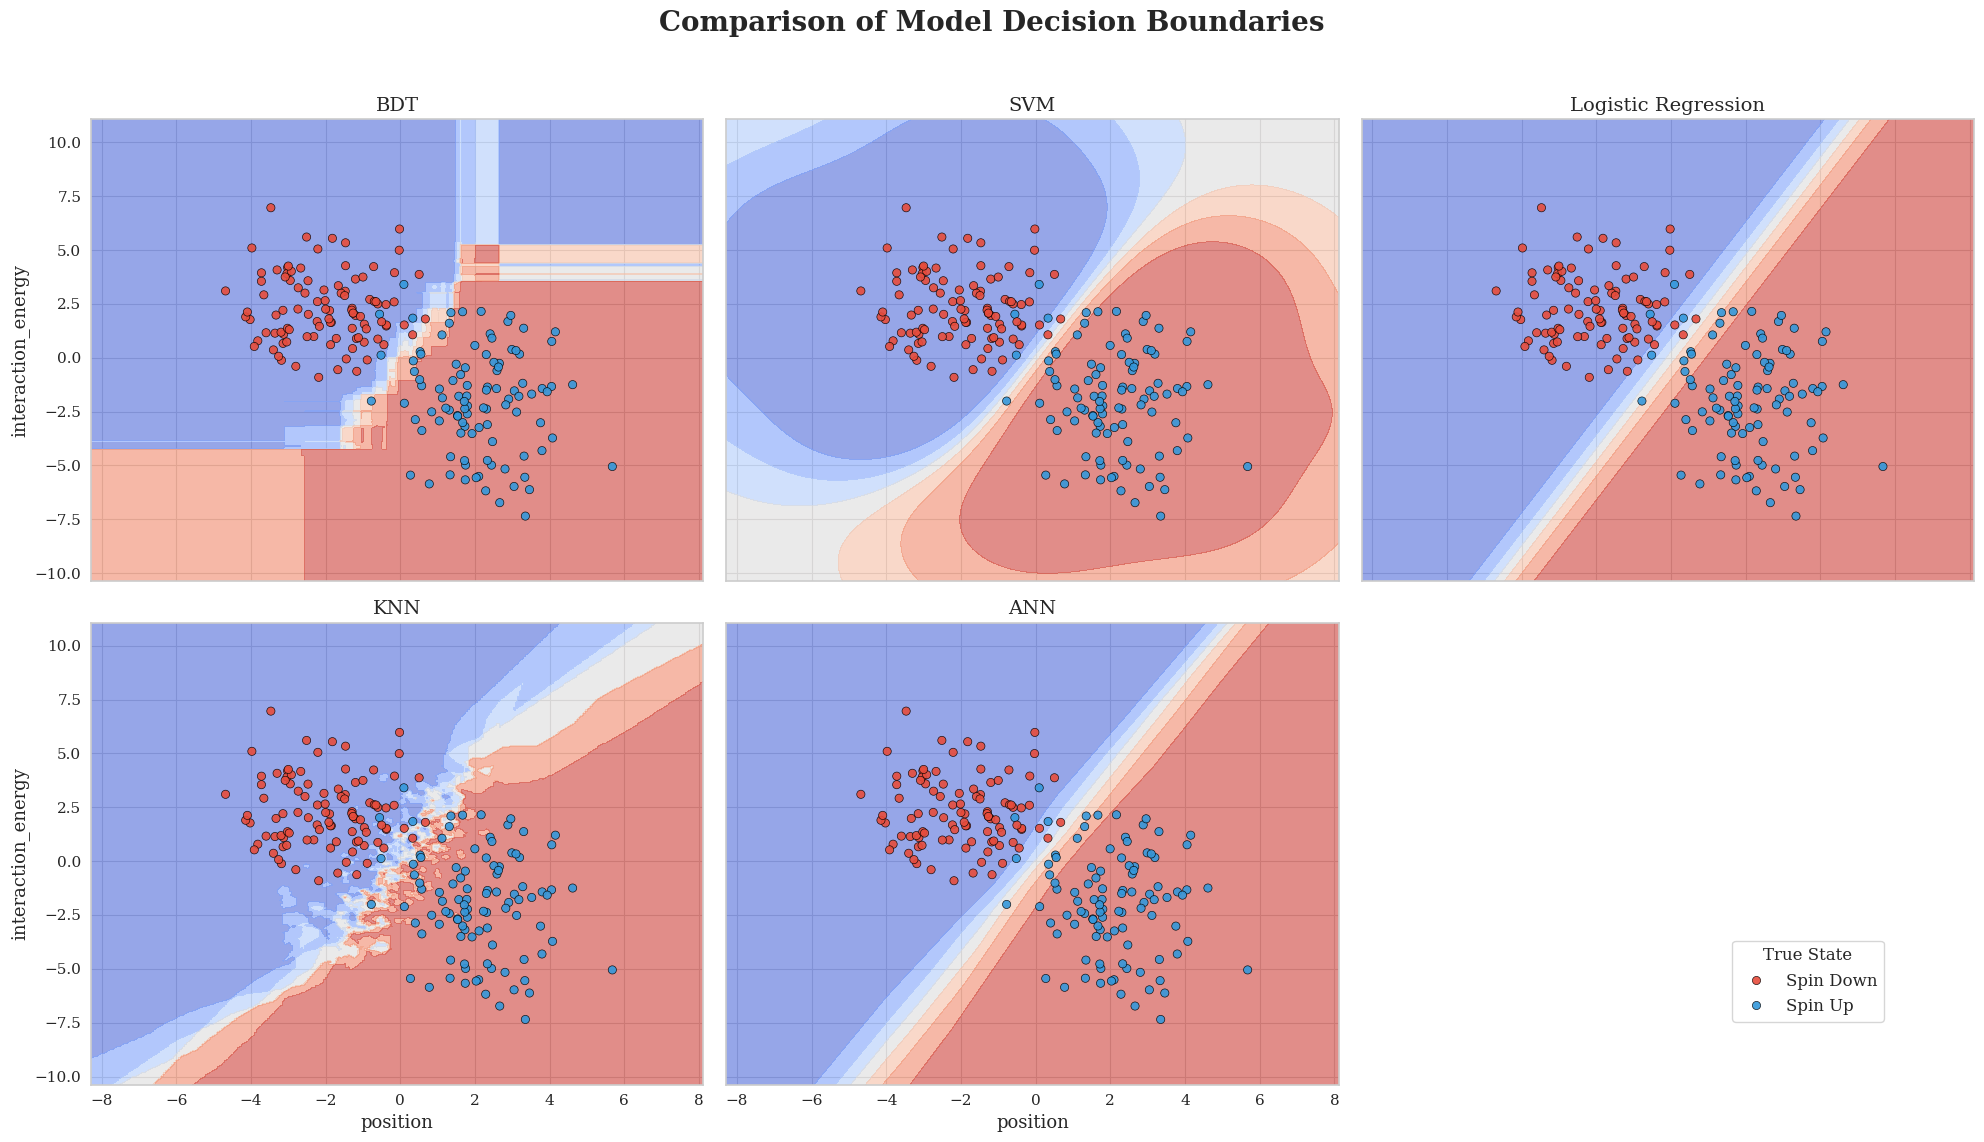

\n### Summary Table: Feature Importance Scores from Current Code ###


,Particle Position,Interaction Energy,Position/Energy Ratio,Method
BDT,0.893,0.107,8.34,Impurity-based
SVM,0.392,0.082,4.76,Permutation
Logistic Regression,0.379,0.102,3.73,Permutation
KNN,0.371,0.101,3.69,Permutation
ANN,0.359,0.120,2.99,Permutation


In [19]:
print("\\n### Visualizing How Each Model Separates the Data ###")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# This dictionary holds the final, trained models.
# NOTE: We use the original svm_model and bdt_model which were trained on unscaled data,
# and the other models which were trained on scaled data.
models_for_boundaries = {
    "BDT": (bdt_model, False), # Boolean indicates if model needs scaled data
    "SVM": (svm_model, False),
    "Logistic Regression": (logreg_model, True),
    "KNN": (knn_model, True),
    "ANN": (ann_model_bce, True)
}

# --- Create a meshgrid of points to plot on ---
# We use the original, unscaled data (X) to define the plot area for all graphs.
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Prepare the grid points for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]
fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()
fig.suptitle('Comparison of Model Decision Boundaries', fontsize=20, fontweight='bold', y=0.95)

# Take a random sample of the test data to overlay on the plots
# Using a sample makes the plots cleaner and faster to render.
X_test_sample = X_test.sample(n=200, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

for i, (name, (model, is_scaled)) in enumerate(models_for_boundaries.items()):
    ax = axes[i]
    
    # Use the appropriate data (scaled or unscaled) for prediction
    data_for_prediction = scaler.transform(grid_points) if is_scaled else grid_points
    
    # Make predictions across the entire grid
    if hasattr(model, 'predict_proba'):
        # For scikit-learn models
        Z = model.predict_proba(data_for_prediction)[:, 1]
    else:
        # For the Keras ANN model
        Z = model.predict(data_for_prediction, verbose=0).flatten()
        
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    sns.scatterplot(x=X_test_sample.iloc[:, 0], y=X_test_sample.iloc[:, 1], hue=y_test_sample,
                    palette=['#e74c3c', '#3498db'], ax=ax, edgecolor='k', s=35, alpha=0.9)
    
    ax.set_title(name, fontsize=14)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.legend().set_visible(False)  # Hide the legend for cleaner plots

# Create a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Spin Down', 'Spin Up'], loc='lower right', bbox_to_anchor=(0.95, 0.1), title='True State', fontsize=12)

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

print("\\n### Summary Table: Feature Importance Scores from Current Code ###")

# This cell uses the 'all_importances' dictionary created in the feature importance cell above.

# 1. Convert the dictionary of Series into a DataFrame
importance_df = pd.DataFrame(all_importances)

# 2. Transpose the DataFrame so that models are rows and features are columns
importance_df = importance_df.T

# Ensure the column order is consistent
importance_df = importance_df[['position', 'interaction_energy']]

# 3. Rename columns to match the paper's table for clarity
importance_df.rename(columns={
    'position': 'Particle Position',
    'interaction_energy': 'Interaction Energy'
}, inplace=True)

# 4. Calculate the Position/Energy Ratio
# Add a small epsilon to the denominator to avoid division by zero errors
epsilon = 1e-9
importance_df['Position/Energy Ratio'] = importance_df['Particle Position'] / (importance_df['Interaction Energy'] + epsilon)

# 5. Add the 'Method' column based on the methods used in THIS notebook's code
methods = {
    "BDT": "Impurity-based",
    "SVM": "Permutation",
    "Logistic Regression": "Permutation", # As calculated in this notebook
    "KNN": "Permutation",
    "ANN": "Permutation"
}
importance_df['Method'] = importance_df.index.map(methods)

# 6. Display the final, formatted table
# We use .style.format() to make the numbers clean and easy to read.
display(importance_df.style.format({
    'Particle Position': '{:.3f}',
    'Interaction Energy': '{:.3f}',
    'Position/Energy Ratio': '{:.2f}'
}).set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))


In [ ]:
print("\n### Final Step: Building a function for manual predictions ###")
import pandas as pd
import numpy as np

# --- 1. Consolidate all our trained models into one dictionary for easy access ---
all_trained_models = {
    "BDT": bdt_model,
    "SVM": svm_model,
    "Logistic Regression": logreg_model,
    "KNN": knn_model,
    "ANN": ann_model_bce
}


def predict_new_particles(input_data, model_name):
    if model_name not in all_trained_models:
        return f"Error: Model '{model_name}' not found. Please choose from {list(all_trained_models.keys())}"
    input_df = pd.DataFrame(input_data, columns=['position', 'interaction_energy'])
    data_for_prediction = input_df.copy()

    # Crucial Preprocessing Step: Scaling
    if model_name in ["SVM", "Logistic Regression", "KNN", "ANN"]:
        print(f"NOTE: Applying StandardScaler for {model_name} model...")
        scaled_data_np = scaler.transform(data_for_prediction) # This is a numpy array
        
        #Convert the numpy array back to a DataFrame with the original column names
        data_for_prediction = pd.DataFrame(scaled_data_np, columns=X_train.columns)

    else:
        print(f"NOTE: BDT does not require data scaling.")

    chosen_model = all_trained_models[model_name]
    confidence_scores = chosen_model.predict_proba(data_for_prediction)[:, 1] if model_name != "ANN" else chosen_model.predict(data_for_prediction).flatten()
    predicted_labels = (confidence_scores > 0.5).astype(int)
    results_df = input_df.copy()
    results_df['Model Confidence (Spin Up)'] = [f"{score:.2%}" for score in confidence_scores]
    results_df['Predicted Label'] = predicted_labels
    results_df['Predicted State'] = np.where(results_df['Predicted Label'] == 1, 'Spin Up', 'Spin Down')
    print(f"\n--- Predictions using the {model_name} model ---")
    return results_df

# --- 3. EXAMPLE USAGE FOR ALL 5 MODELS ---

# Let's create our new, arbitrary particle data by hand.
new_particles_data = [
    [2.8, 2.5],      
    [-2.5, -2.1],    
    [0.1, 0.2],      
    [-1.5, 2.0],     
    [1.8, -1.5]      
]

# --- Get predictions using each model ---
print("\n" + "="*50)
print("RUNNING PREDICTIONS FOR ALL MODELS ON NEW DATA")
print("="*50)

bdt_results = predict_new_particles(new_particles_data, model_name="BDT")
print(bdt_results)

svm_results = predict_new_particles(new_particles_data, model_name="SVM")
print(svm_results)

logreg_results = predict_new_particles(new_particles_data, model_name="Logistic Regression")
print(logreg_results)

knn_results = predict_new_particles(new_particles_data, model_name="KNN")
print(knn_results)

ann_results = predict_new_particles(new_particles_data, model_name="ANN")
print(ann_results)


### Final Step: Building a function for manual predictions ###

RUNNING PREDICTIONS FOR ALL MODELS ON NEW DATA
NOTE: BDT does not require data scaling.

--- Predictions using the BDT model ---
   position  interaction_energy Model Confidence (Spin Up)  Predicted Label  \
0       2.8                 2.5                     99.32%                1   
1      -2.5                -2.1                      6.87%                0   
2       0.1                 0.2                     62.42%                1   
3      -1.5                 2.0                      1.09%                0   
4       1.8                -1.5                     99.78%                1   

  Predicted State  
0         Spin Up  
1       Spin Down  
2         Spin Up  
3       Spin Down  
4         Spin Up  
NOTE: Applying StandardScaler for SVM model...

--- Predictions using the SVM model ---
   position  interaction_energy Model Confidence (Spin Up)  Predicted Label  \
0       2.8                 2.5             